<a href="https://colab.research.google.com/github/JonathanPuertaG/Challenge2-TelecomX/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Telecom X está enfrentando una alta tasa de cancelaciones de clientes. Este análisis tiene como objetivo identificar los factores que influyen en la evasión (churn) para apoyar decisiones estratégicas y el desarrollo de modelos predictivos.

### Objetivos específicos

- Comprender el comportamiento de los clientes que cancelan el servicio.
- Detectar patrones y características asociadas al churn.
- Visualizar tendencias clave y generar insights para la retención.


##📌 Extracción

In [173]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


> El dataset contiene algunas columnas con estructura anidada (diccionarios) que deben ser transformadas antes del análisis.


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##🔧 Transformación


Las columnas `customer`, `phone`, `internet` y `account` contienen diccionarios. Para convertirlas en columnas individuales, usé `pandas.json_normalize()`:


In [175]:
# Normalizar columnas anidadas
df_plano  = pd.json_normalize(df['customer'])
phone_data = pd.json_normalize(df['phone'])
internet_data = pd.json_normalize(df['internet'])
account_data = pd.json_normalize(df['account'])

# Concatenar columnas planas
df_final = pd.concat(
    [df[['customerID', 'Churn']],
     df_plano ,
     phone_data,
     internet_data,
     account_data],
    axis=1
)

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


> Ahora contamos con un DataFrame plano, donde cada columna representa una variable única, lo que facilita el análisis exploratorio.


In [176]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [177]:
#No se evidencian valores nulos, sin embargo es necesario validar valores vacíos (espacios o cadenas vacías)
df_final['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [178]:
## Como se identificaron valores vacios en la columna churn es necesario validarlo para las demas columnas
for col in df_final.columns:
    print(f"\n🔍 Columna: {col}")
    print(df_final[col].value_counts(dropna=False))



🔍 Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

🔍 Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🔍 Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

🔍 Columna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

🔍 Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

🔍 Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

🔍 Columna: tenure
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

🔍 Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

🔍 Columna: MultipleLines
MultipleLines
No                  3495
Yes    

In [179]:
# 1.Corregir tipo de dato en 'Charges.Total'
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print(df_final['Charges.Total'].dtype)

float64


In [180]:
#2. Reemplazar valores vacíos o solo espacios por NaN
df_final.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


In [181]:
# 3. Verificar y mostrar valores nulos por columna
print("Valores nulos por columna:")
print(df_final.isna().sum())

Valores nulos por columna:
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [182]:
# 4. Eliminar registros con 'Churn' nulo
df_final = df_final.dropna(subset=['Churn'])

In [183]:
# 5. Eliminar registros donde 'Charges.Total' quedó como NaN tras la conversión
df_final = df_final.dropna(subset=['Charges.Total'])

In [184]:
# 6. Conversión del tipo 'Charges.Total' (ya se hizo), aseguramos el tipo
df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)

In [185]:
# 7. Revision de duplicados
print(df_final.duplicated().sum())

0


In [186]:
# 8. Resetear el índice después de eliminar filas
df_final.reset_index(drop=True, inplace=True)

In [187]:
# 9. Vista general del DataFrame limpio
print("\nVista general del DataFrame limpio:")
print(df_final.info())
print(df_final.head())


Vista general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contr

In [188]:
# Creamos la columna "Cuentas_Diarias"
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Verificamos las primeras filas
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [189]:
df_final[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].sample(5)


,customerID,Charges.Monthly,Cuentas_Diarias
3865,5447-VYTKW,53.45,1.781667
964,1399-OUPJN,19.75,0.658333
115,0201-OAMXR,115.55,3.851667
910,1324-NLTJE,55.00,1.833333
669,0979-MOZQI,39.00,1.300000


##📊 Carga y análisis

### 🔢 Resumen estadístico general

In [190]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### 🧮 Distribución de variables categóricas

In [191]:
df_final['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.421502
Yes,26.578498


In [192]:
df_final['Contract'].value_counts(normalize=True) * 100

,proportion
Contract,
Month-to-month,55.105233
Two year,23.961889
One year,20.932878


In [193]:
df_final['InternetService'].value_counts(normalize=True) * 100

,proportion
InternetService,
Fiber optic,44.027304
DSL,34.357224
No,21.615472


In [194]:
df_final['gender'].value_counts(normalize=True) * 100

,proportion
gender,
Male,50.469283
Female,49.530717


### 📈 Visualizaciones para el Análisis Descriptivo

In [195]:
# crear rangos para tenure
df_final['rango_tenure'] = pd.cut(df_final['tenure'],
                                 bins=[0, 6, 12, 24, 36, 48, 60, 72],
                                 labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'],
                                 right=True)

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def graficar_abandono(columna_grupo, titulo, xlabel):
    # Tabla de contingencia
    tabla = df_final.groupby([columna_grupo, 'Churn'], observed=True).size().unstack().fillna(0)

    # Calcular porcentaje de abandono (Churn == 'Yes')
    tabla['ChurnPercent'] = (tabla.get('Yes', 0) / tabla.sum(axis=1)) * 100

    # Orden de las categorías
    orden = tabla.index.tolist()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_final, x=columna_grupo, hue='Churn', palette='Set2', order=orden)

    # Mostrar valores numéricos sobre las barras
    for p in ax.patches:
        valor = int(p.get_height())
        if valor > 0:
            ax.text(p.get_x() + p.get_width() / 2,
                    p.get_height() + 2,
                    f'{valor:,}',
                    ha='center', va='bottom', fontsize=9)

    # Agregar porcentaje de abandono en rojo con flecha
    for i, grupo in enumerate(orden):
        try:
            idx = i * 2 + 1  # índice de la barra Churn == 'Yes'
            p = ax.patches[idx]
            porcentaje = tabla.loc[grupo, 'ChurnPercent']

            # Etiqueta de porcentaje
            ax.text(p.get_x() + p.get_width() / 2,
                    p.get_height() + 90,
                    f'{porcentaje:.0f}%',
                    ha='center', va='bottom', fontsize=11, color='red', fontweight='bold')

        except IndexError:
            continue

    # Títulos y ajustes
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


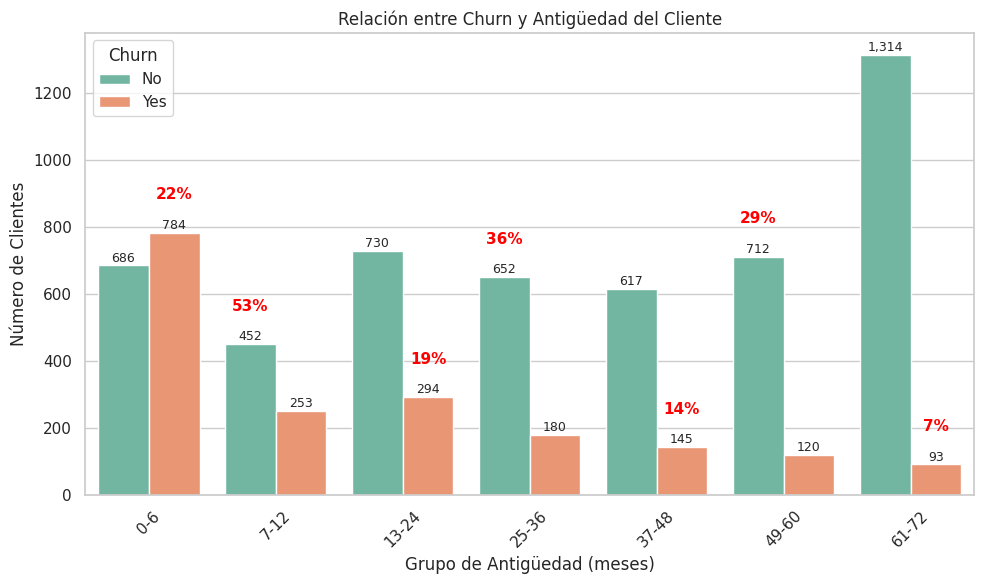

In [229]:
graficar_abandono('rango_tenure', 'Relación entre Churn y Antigüedad del Cliente', 'Grupo de Antigüedad (meses)')

##📄Informe final